<a href="https://colab.research.google.com/github/Preciousosas/Insurance-Data-Analysis/blob/main/Insurance_Premium_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hamoye/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Data Exploration**

In [ ]:
fig = px.scatter(df,x='charges',y ='age', color = 'sex')
fig.show()

In [ ]:
fig = px.scatter(df,x='charges',y ='children')
fig.show()

In [ ]:
fig = px.scatter(df,x='smoker',y ='charges')
fig.show()

In [ ]:
fig = px.scatter(df,x='smoker',y ='age',color ='age')
fig.show()

In [ ]:
smoker_yes = df[df['smoker'] == 'yes']
smoker_no = df[df['smoker'] == 'no']

In [ ]:
print('Not a smoker:', smoker_no.shape)
print('I smoke:', smoker_yes.shape)

Not a smoker: (1064, 7)
I smoke: (274, 7)


In [ ]:
fig = px.scatter(df,x='region',y ='charges')
fig.show()

<Axes: xlabel='region', ylabel='charges'>

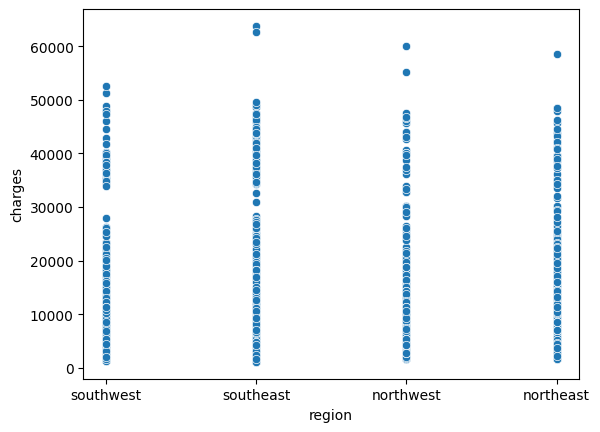

In [ ]:
sns.scatterplot(df, x='region',y = 'charges')

In [ ]:
df_corr = df.drop(columns = ['sex','region','smoker'], axis =0)


<Axes: >

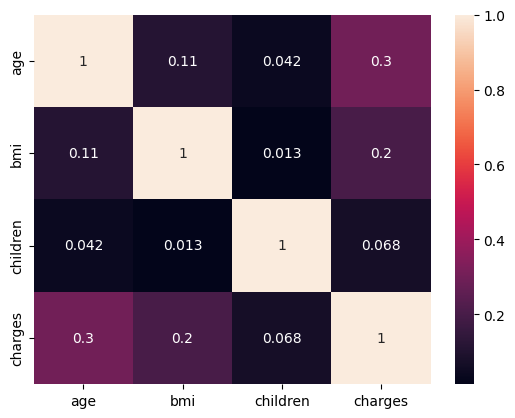

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

In [ ]:
# Encode the categorical Variable
label_encoder = LabelEncoder()

df['region'] = label_encoder.fit_transform(df['region'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [ ]:
# Dropped this two columns because they have little or no importance on the prediction
df = df.drop(['sex','region'],axis = 1)

In [ ]:
# Normalize the dataset to a range of 0 to 1
scaler = MinMaxScaler()
df_transformed = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_transformed, columns = df.columns)
df_scaled.head()

,age,bmi,children,smoker,charges
0,0.021739,0.321227,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,0.053115
3,0.326087,0.181464,0.0,0.0,0.333010
4,0.304348,0.347592,0.0,0.0,0.043816


In [ ]:
x = df_scaled.drop(columns=['charges'])
y = df_scaled['charges']

In [ ]:
# train_test_split on the fecture and targeted variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 12)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_predicit = linear_model.predict(x_test)

In [ ]:
# Evaluate the Regression model for the trained data
mse = mean_absolute_error(y_test, y_predicit)
print(f'Mean Absolute Error is: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_predicit))
print(f'The root mean squared error: {rmse}')

r2 = r2_score(y_test, y_predicit)
print(f'R2 score is: {r2}')

Mean Absolute Error is: 0.06903707218765681
The root mean squared error: 0.10374085242269093
R2 score is: 0.7066914022987726


In [ ]:
ridge_param = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'fit_intercept':[True,False],
               'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }

lasso_param = {'alpha':[0.001,0.01,0.1,1,10,100,1000],
               'fit_intercept':[True,False],
               'copy_X': [True,False]}

In [ ]:
# Trying to convert the process to a simplified function
def Analysis_with_the_best_model(model):
  ridge_param = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'fit_intercept':[True,False],
               'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
  lasso_param = {'alpha':[0.001,0.01,0.1,1,10,100,1000],
               'fit_intercept':[True,False],
               'copy_X': [True,False]}

  if model.__class__.__name__.lower == 'ridge':
    models = model()
    models_cv = GridSearchCV(models,ridge_param,cv=5)
    models_cv.fit(x_train,y_train)

    models_best = model(**models_cv.best_params_, random_state= 4)
    models_best.fit(x_train,y_train)


In [ ]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge,ridge_param,cv=5)
ridge_cv.fit(x_train,y_train)

print(f'The ridge best param : {ridge_cv.best_params_}')


The ridge best param : {'alpha': 1, 'fit_intercept': True, 'solver': 'sag'}


In [ ]:
ridge_best = Ridge(**ridge_cv.best_params_, random_state= 4)
ridge_best.fit(x_train,y_train)

Ridge(alpha=1, random_state=4, solver='sag')

In [ ]:
y_ridge = ridge_best.predict(x_test)

In [ ]:
# Evaluate the Regression model for the trained data
mse = mean_absolute_error(y_test, y_ridge)
print(f'Mean Absolute Error is: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_ridge))
print(f'The root mean squared error: {rmse}')

r2 = r2_score(y_test, y_ridge)
print(f'R2 score is: {r2}')

Mean Absolute Error is: 0.06878728909869614
The root mean squared error: 0.10367000098813499
R2 score is: 0.7070919048580063


In [ ]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_param, cv=5)
lasso_cv.fit(x_train, y_train)

print(f'The best lasso : {lasso_cv.best_params_}')

The best lasso : {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True}


In [ ]:
lasso_best = Lasso(**lasso_cv.best_params_, random_state = 3)
lasso_best.fit(x_train,y_train)

y_lasso = lasso_best.predict(x_test)

In [ ]:
# Evaluate the Regression model for the trained data
mse = mean_absolute_error(y_test, y_lasso)
print(f'Mean Absolute Error is: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_lasso))
print(f'The root mean squared error: {rmse}')

r2 = r2_score(y_test, y_lasso)
print(f'R2 score is: {r2}')

Mean Absolute Error is: 0.06805685708590621
The root mean squared error: 0.1038249312001926
R2 score is: 0.7062157743999719


In [ ]:
# Evaluate feature importance

def plot_feature_importance(model):
  feature = df.columns
  feature = feature.drop('charges')
  feature_importance = pd.Series(model.coef_, index=feature)
  feature_importance.plot(kind= 'barh')

  if model.__class__.__name__.lower() == 'ridge':
    plt.title('Feature importance of ridge regressor')
  elif model.__class__.__name__.lower() == 'lasso':
    plt.title('Feature importance of lasso regressor')
  else:
    plt.title('Feature importance of linear regressor')

  plt.show()

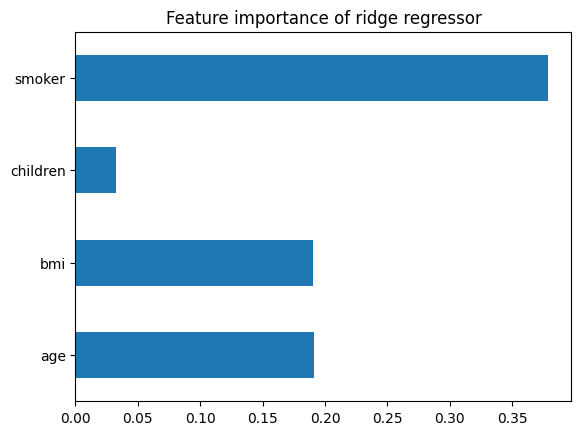

In [ ]:
plot_feature_importance(model = ridge_best)

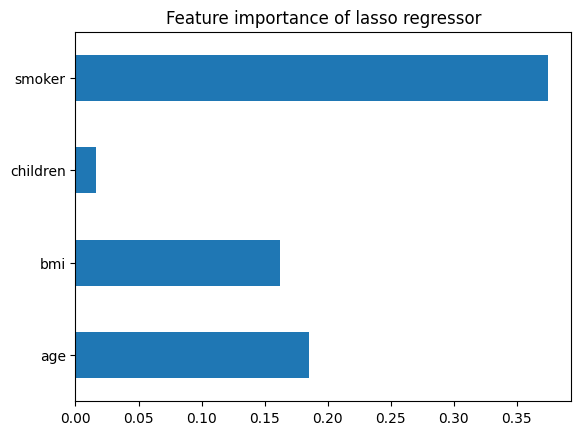

In [ ]:
plot_feature_importance(model = lasso_best)

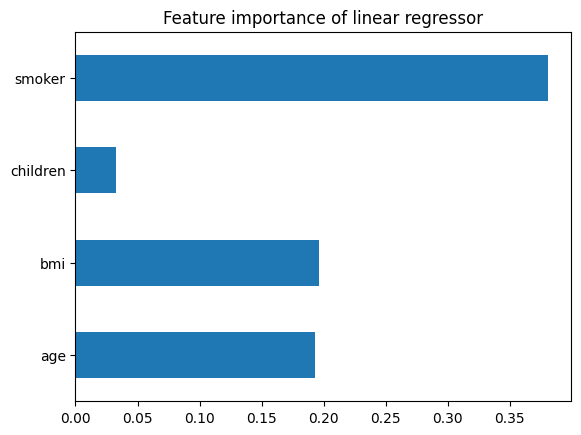

In [ ]:
plot_feature_importance(model = linear_model)

In [ ]:
feature = df.columns
feature

Index(['age', 'bmi', 'children', 'smoker', 'charges'], dtype='object')